# Phase 2-1 : 小規模な知識グラフを作ってみる 【手動作成】

このノートブックでは、手動でトリプルを作成し、小規模な知識グラフを構築してみる。

## 目標

- トリプル（主語, 述語, 目的語）の3つ組構造の理解
- スキーマ設計のさわりを感じる
- グラフ検索の仕組みを理解する

## ライブラリのインポート

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

## サンプルデータ作成

ハードコードする

In [2]:
# triples = [
#     {"subject": "LangChain", "predicate": "uses", "object": "OpenAI API"},
#     {"subject": "LangChain", "predicate": "integrates", "object": "Neo4j"},
#     {"subject": "Neo4j", "predicate": "supports", "object": "Cypher"},
#     {"subject": "RAG", "predicate": "uses", "object": "VectorStore"}, 
#     {"subject": "VectorStore", "predicate": "implemented_by", "object": "FAISS"}, 
# ]


In [3]:
triples_1 = [
    {"subject": "Logistic Regression", "predicate": "used_for", "object": "Binary Classification"},
    {"subject": "Logistic Regression", "predicate": "computes", "object": "Linear Combination"},
    {"subject": "Logistic Regression", "predicate": "uses_activation", "object": "Sigmoid Function"},
    {"subject": "Gradient Descent", "predicate": "optimizes", "object": "Logistic Regression"},
]
triples_2 = [
    {"subject": "Decision Tree", "predicate": "splits_by", "object": "Conditions"},
    {"subject": "Random Forest", "predicate": "has_component", "object": "Decision Tree"},
    {"subject": "Decision Tree", "predicate": "trained_on", "object": "Data Subset"},
]
triples_3 = [
    {"subject": "Neural Network", "predicate": "has_component", "object": "Input Layer"},
    {"subject": "Neural Network", "predicate": "has_component", "object": "Hidden Layer"},
    {"subject": "Neural Network", "predicate": "has_component", "object": "Output Layer"},
    {"subject": "Neural Network", "predicate": "updated_by", "object": "Backpropagation"},
    {"subject": "Neural Network", "predicate": "uses_activation", "object": "ReLU"},
    {"subject": "Neural Network", "predicate": "uses_activation", "object": "Sigmoid"},
]
triples_4 = [
    {"subject": "Support Vector Machine", "predicate": "is_based_on", "object": "Margin Maximization"},
    {"subject": "Support Vector Machine", "predicate": "uses", "object": "Kernel Trick"},
    {"subject": "Kernel Trick", "predicate": "enables", "object": "Nonlinear Classification"},
    {"subject": "Support Vector Machine", "predicate": "uses_kernel", "object": "RBF Kernel"},
]
triples_5 = [
    {"subject": "Transformer", "predicate": "is_based_on", "object": "Attention"},
    {"subject": "Transformer", "predicate": "has_component", "object": "Encoder"},
    {"subject": "Transformer", "predicate": "has_component", "object": "Decoder"},
    {"subject": "Self-Attention", "predicate": "captures", "object": "Sequence Dependencies"},
    {"subject": "GPT", "predicate": "is_based_on", "object": "Transformer"},
    {"subject": "GPT", "predicate": "uses_component", "object": "Decoder"},
    {"subject": "BERT", "predicate": "is_based_on", "object": "Transformer"},
    {"subject": "BERT", "predicate": "uses_component", "object": "Encoder"},
]
triples = triples_1 + triples_2 + triples_3 + triples_4 + triples_5


## グラフ作成と描画

In [4]:
G = nx.DiGraph()  # 有向グラフ。知識グラフは方向性がある

for triple in triples:
    s, p, o = triple["subject"], triple["predicate"], triple["object"]
    G.add_node(s)
    G.add_node(o)
    G.add_edge(s, o, relation=p)

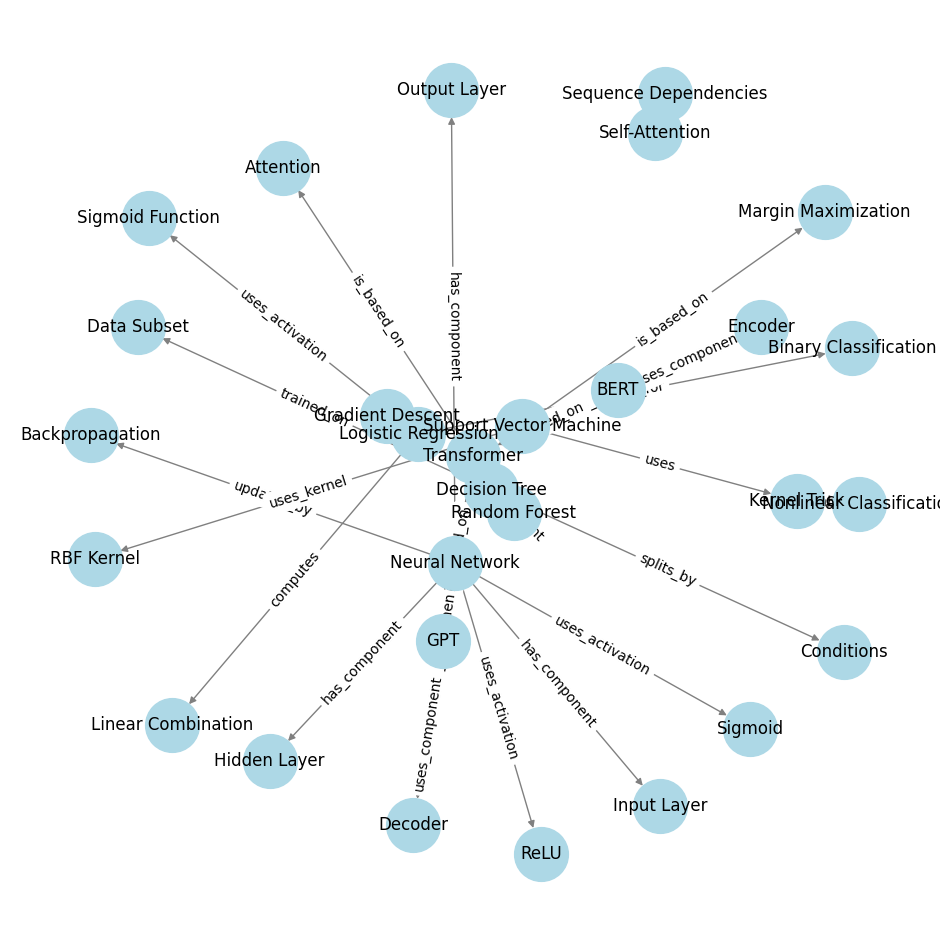

In [6]:
pos = nx.spring_layout(G, seed=42)
edge_labels = nx.get_edge_attributes(G, "relation")

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
nx.draw(G, pos, ax=ax, with_labels=True, node_color='lightblue',
        node_size=1500, edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
# fig.tight_layout()
plt.show()